In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from Data.Dataset import LatentFMRIDataset
import matplotlib.pyplot as plt

Hyperparams

In [2]:
data_directory = '/Users/balazsmorvay/PycharmProjects/VAE/Assets/UM_1_all'
c = 1.0

Create dataset

In [3]:
dataset = LatentFMRIDataset(data_dir=data_directory)
all_data_items = dataset.get_all_items()
X = all_data_items['X']
y = all_data_items['y']

In [4]:
X.shape, y.shape

((465, 4, 16, 18), (465,))

Split dataset to train, val and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [6]:
X_train.shape, X_test.shape, X_val.shape

((372, 4, 16, 18), (47, 4, 16, 18), (46, 4, 16, 18))

Check the partitions' distribution

In [7]:
np.mean(y_train), np.mean(y_val), np.mean(y_test)

(1.5510752688172043, 1.565217391304348, 1.7234042553191489)

Flatten the latents

In [8]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1)) 
X_test = X_test.reshape((X_test.shape[0], -1)) 

X_train.shape, X_test.shape, X_val.shape

((372, 1152), (47, 1152), (46, 1152))

Create and train model

In [9]:
model = SVC(kernel='rbf', C=c, class_weight='balanced', random_state=42, verbose=True)
model.fit(X=X_train, y=y_train)

[LibSVM]*
optimization finished, #iter = 309
obj = -158.898455, rho = -0.565407
nSV = 257, nBSV = 208
Total nSV = 257


SVC(class_weight='balanced', random_state=42, verbose=True)

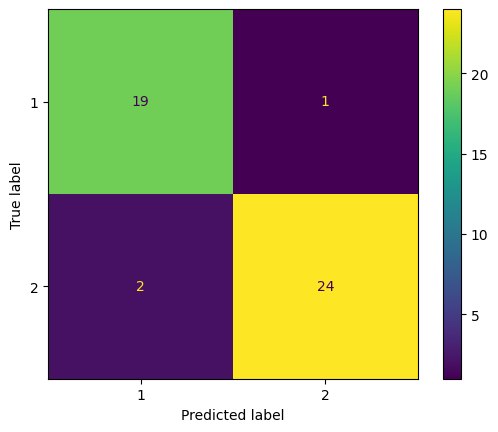

In [10]:
val_predictions = model.predict(X_val)

cm = confusion_matrix(y_val, val_predictions, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()
plt.show()

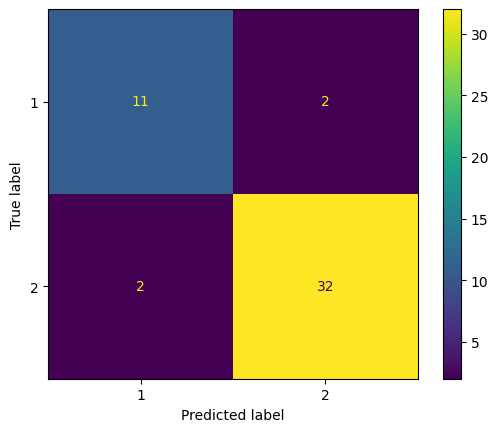

In [11]:
test_predictions = model.predict(X_test)

cm = confusion_matrix(y_test, test_predictions, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()
plt.show()